**Imports:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Automating_Port_Operations_dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import os
import random
import matplotlib.pyplot as plt

# Directory containing the boat type folders
dataset_dir = '/content/Automating_Port_Operations_dataset'

# Get list of boat type folders
boat_types = os.listdir(dataset_dir)

# Count number of images in each folder and print
for boat_type in boat_types:
    if boat_type == '.DS_Store':
      continue
    boat_type_dir = os.path.join(dataset_dir, boat_type)
    num_images = len(os.listdir(boat_type_dir))
    print(f"{boat_type}: {num_images} images")

sailboat: 389 images
buoy: 53 images
gondola: 193 images
freight_boat: 23 images
cruise_ship: 191 images
kayak: 203 images
inflatable_boat: 16 images
ferry_boat: 63 images
paper_boat: 31 images


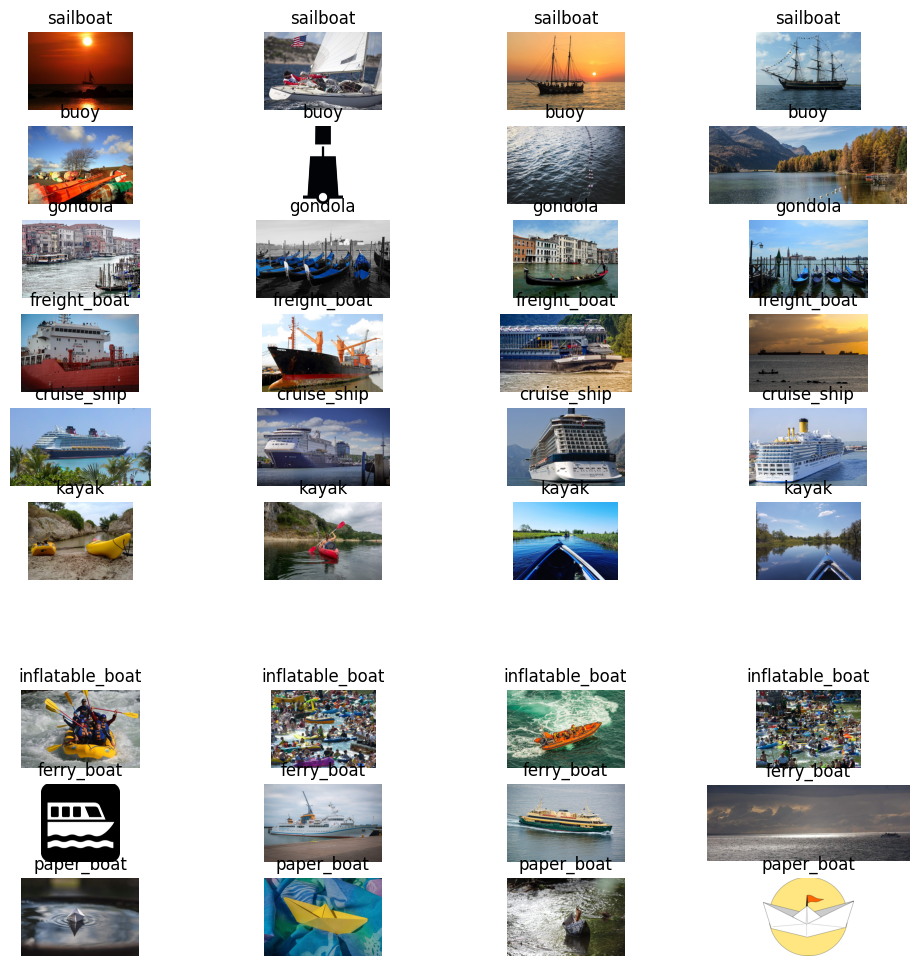

In [ ]:
# Print some sample images from each category
plt.figure(figsize=(12, 12))
for i, boat_type in enumerate(boat_types, 1):
    if boat_type == '.DS_Store':
      continue
    boat_type_dir = os.path.join(dataset_dir, boat_type)
    image_files = os.listdir(boat_type_dir)
    random_images = random.sample(image_files, 4)  # Change 4 to desired number of sample images
    for j, image_file in enumerate(random_images, 1):
        image_path = os.path.join(boat_type_dir, image_file)
        image = plt.imread(image_path)
        plt.subplot(len(boat_types), 4, (i-1)*4 + j)
        plt.imshow(image)
        plt.title(boat_type)
        plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [ ]:
# Step 1.1: Load the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Automating_Port_Operations_dataset',
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='training',
    seed=43,
    image_size=(256, 256),
    batch_size=32
    #image_scale=1./255  # Data normalization
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Automating_Port_Operations_dataset',
    labels='inferred',
    label_mode='categorical',
    validation_split=0.2,
    subset='validation',
    seed=43,
    image_size=(256, 256),
    batch_size=32
    #image_scale=1./255  # Data normalization
)

Found 1162 files belonging to 9 classes.
Using 930 files for training.
Found 1162 files belonging to 9 classes.
Using 232 files for validation.


In [ ]:
# Step 1.4: Build the CNN model
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(256, 256, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')
])

In [ ]:
# Step 1.5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
# Step 1.6: Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
30/30 [==============================] - 12s 193ms/step - loss: 1.9586 - accuracy: 0.3086 - precision: 0.6111 - recall: 0.0237 - val_loss: 1.8274 - val_accuracy: 0.3017 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
30/30 [==============================] - 6s 152ms/step - loss: 1.8172 - accuracy: 0.3430 - precision: 0.4483 - recall: 0.0140 - val_loss: 1.8160 - val_accuracy: 0.3017 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
30/30 [==============================] - 6s 171ms/step - loss: 1.8003 - accuracy: 0.3430 - precision: 0.7895 - recall: 0.0161 - val_loss: 1.8019 - val_accuracy: 0.3017 - val_precision: 1.0000 - val_recall: 0.0216
Epoch 4/20
30/30 [==============================] - 6s 146ms/step - loss: 1.7762 - accuracy: 0.3452 - precision: 0.6190 - recall: 0.0280 - val_loss: 1.7866 - val_accuracy: 0.2931 - val_precision: 0.7778 - val_recall: 0.0302
Epoch 5/20
30/30 [==============================] - 7s 194ms/step - loss: 1.7492 - accu

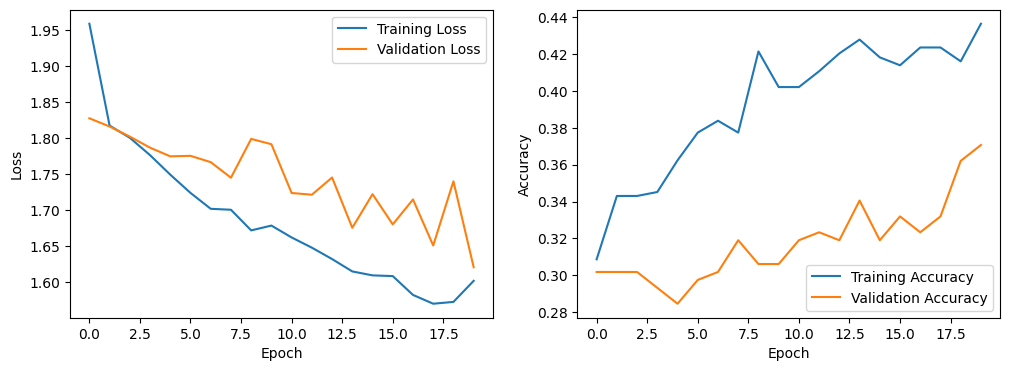

In [ ]:
# Plot training loss and accuracy against epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Step 1.7: Evaluate the model on test images
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Automating_Port_Operations_dataset',
    labels='inferred',
    label_mode='categorical',
    seed=43,
    image_size=(256, 256),
    batch_size=32
)

Found 1162 files belonging to 9 classes.


In [ ]:
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(val_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

8/8 [==============================] - 1s 23ms/step - loss: 1.6207 - accuracy: 0.3707 - precision: 0.4194 - recall: 0.0560
Test Loss: 1.620656132698059
Test Accuracy: 0.37068966031074524
Test Precision: 0.4193548262119293
Test Recall: 0.05603448301553726


In [ ]:
# Extract true labels and predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    y_true.extend(tf.argmax(labels, axis=1))
    y_pred.extend(tf.argmax(model.predict(images), axis=1))

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Compute evaluation metrics
test_loss = model.evaluate(val_ds)[0]
test_accuracy = np.mean(y_true == y_pred)
test_precision = tf.keras.metrics.Precision()(y_true, y_pred)
test_recall = tf.keras.metrics.Recall()(y_true, y_pred)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

8/8 [==============================] - 2s 29ms/step - loss: 1.6207 - accuracy: 0.3707 - precision: 0.4194 - recall: 0.0560
Test Loss: 1.62065589427948
Test Accuracy: 0.3706896551724138
Test Precision: 0.943965494632721
Test Recall: 1.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
import matplotlib.pyplot as plt

In [ ]:
# Step 2.4: Build the lightweight CNN model using MobileNetV2 as the first layer
base_model = applications.MobileNetV2(input_shape=(256, 256, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(9, activation='softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
# Step 2.5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:

# Step 2.6: Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_ds, validation_data=val_ds, epochs=50, callbacks=[early_stopping])


Epoch 1/50
30/30 [==============================] - 16s 222ms/step - loss: 2.3188 - accuracy: 0.3226 - precision_2: 0.4502 - recall_2: 0.2043 - val_loss: 1.9636 - val_accuracy: 0.3103 - val_precision_2: 0.6667 - val_recall_2: 0.0948
Epoch 2/50
30/30 [==============================] - 7s 195ms/step - loss: 1.5221 - accuracy: 0.5430 - precision_2: 0.6918 - recall_2: 0.3742 - val_loss: 1.7178 - val_accuracy: 0.4095 - val_precision_2: 0.6296 - val_recall_2: 0.1466
Epoch 3/50
30/30 [==============================] - 5s 149ms/step - loss: 1.3229 - accuracy: 0.5817 - precision_2: 0.7058 - recall_2: 0.4333 - val_loss: 1.4382 - val_accuracy: 0.5216 - val_precision_2: 0.7432 - val_recall_2: 0.2371
Epoch 4/50
30/30 [==============================] - 7s 203ms/step - loss: 1.1519 - accuracy: 0.6376 - precision_2: 0.7616 - recall_2: 0.4946 - val_loss: 1.3986 - val_accuracy: 0.5517 - val_precision_2: 0.7640 - val_recall_2: 0.2931
Epoch 5/50
30/30 [==============================] - 5s 151ms/step - los

In [ ]:

test_loss, test_accuracy, test_precision, test_recall = model.evaluate(val_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

8/8 [==============================] - 1s 57ms/step - loss: 1.3134 - accuracy: 0.5690 - precision_2: 0.6457 - recall_2: 0.4871
Test Loss: 1.3134430646896362
Test Accuracy: 0.568965494632721
Test Precision: 0.645714282989502
Test Recall: 0.48706895112991333


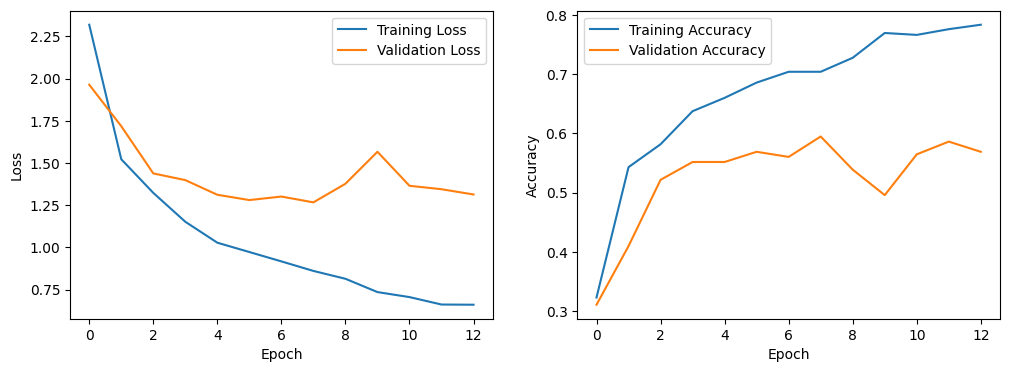

In [ ]:

# Step 2.8: Plot Train loss Vs Validation loss and Train accuracy Vs Validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Automating_Port_Operations_dataset',
    labels='inferred',
    label_mode='categorical',
    validation_split=0.3,  # Splitting into 70% train and 30% test
    subset='training',
    seed=1,
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Automating_Port_Operations_dataset',
    labels='inferred',
    label_mode='categorical',
    validation_split=0.3,
    subset='validation',
    seed=1,
    image_size=(224, 224),
    batch_size=32
)

# Step 2.2: Define data augmentation parameters for training set
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)



Found 1162 files belonging to 9 classes.
Using 814 files for training.
Found 1162 files belonging to 9 classes.
Using 348 files for validation.


In [ ]:
# Step 2.3: Extract images and labels from the training dataset
X_train = []
y_train = []

for images, labels in train_ds:
    X_train.append(images)
    y_train.append(labels)

X_train = tf.concat(X_train, axis=0)
y_train = tf.concat(y_train, axis=0)

# Step 2.4: Load the augmented training dataset
train_ds_augmented = train_datagen.flow(
    x=X_train,
    y=y_train,
    batch_size=32,
    seed=1
)

In [ ]:


# Step 2.4: Build the lightweight CNN model using MobileNetV2 as the first layer
base_model = applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(9, activation='softmax')
])

# Step 2.5: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Step 2.6: Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(train_ds_augmented, validation_data=val_ds, epochs=50, callbacks=[early_stopping])

Epoch 1/50
26/26 [==============================] - 19s 478ms/step - loss: 1.4306 - accuracy: 0.5725 - precision_3: 0.7299 - recall_3: 0.4582 - val_loss: 2.4435 - val_accuracy: 0.3247 - val_precision_3: 0.4895 - val_recall_3: 0.2011
Epoch 2/50
26/26 [==============================] - 12s 470ms/step - loss: 0.7527 - accuracy: 0.7703 - precision_3: 0.8589 - recall_3: 0.6953 - val_loss: 3.4089 - val_accuracy: 0.3161 - val_precision_3: 0.3206 - val_recall_3: 0.3132
Epoch 3/50
26/26 [==============================] - 12s 453ms/step - loss: 0.5837 - accuracy: 0.8329 - precision_3: 0.8829 - recall_3: 0.7592 - val_loss: 3.5404 - val_accuracy: 0.3161 - val_precision_3: 0.3254 - val_recall_3: 0.3132
Epoch 4/50
26/26 [==============================] - 12s 476ms/step - loss: 0.4733 - accuracy: 0.8587 - precision_3: 0.8962 - recall_3: 0.8059 - val_loss: 3.4134 - val_accuracy: 0.2845 - val_precision_3: 0.3158 - val_recall_3: 0.2241
Epoch 5/50
26/26 [==============================] - 12s 473ms/step -